In [4]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn

# Data

In [12]:
np.random.seed(2025)

m = 100

X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

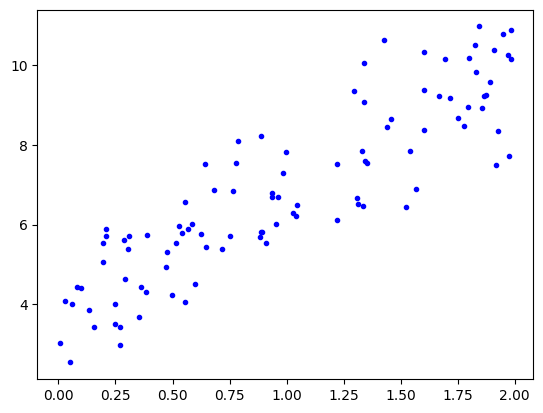

In [13]:
plt.plot(X, y, "b.")
plt.show()

## training and testing sets

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=2025)

In [15]:
X_train.shape, X_test.shape

((80, 1), (20, 1))

# Model Training

In [16]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [17]:
lin_reg.intercept_, lin_reg.coef_

(array([3.91524006]), array([[2.96600571]]))

## Training and testing MSE

In [18]:
from sklearn.metrics import mean_squared_error

train_pred = lin_reg.predict(X_train)

train_mse = mean_squared_error(y_train, train_pred)

train_mse

0.9809806002079501

In [19]:
test_pred = lin_reg.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
test_mse

1.0794276592323748